<h1> LABORATORIO 4 <H1>
<h2>ALUMNO: LOAIZA CORONADO RODRIGO JAIRO </h2>
<h2>CARRERA ING. DE SISTEMAS</h2>
<h3>FECHA: 31/03/2024</h3>

In [328]:
import os
import numpy as np
from matplotlib import pyplot
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# Modulo de optimizacion en scipy
from scipy import optimize

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [4]:
#Importamos los datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Leer datos
data = np.loadtxt('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :12]
y = data[:, 12]   # Última columna (EquivDiameter)

m = y.size  # Tamaño de y (número de ejemplos)

In [6]:
X.shape

(13611, 12)

In [7]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
#print(X_norm)

Media calculada: [5.30482845e+04 8.55283459e+02 3.20141867e+02 2.02270714e+02
 1.58324198e+00 7.50894929e-01 5.37682002e+04 7.49732787e-01
 9.87142844e-01 8.73281831e-01 7.99863682e-01 6.56360851e-03]
Desviación estandar calculada: [2.93230185e+04 2.14281824e+02 8.56910379e+01 4.49684393e+01
 2.46669394e-01 9.19983835e-02 2.97738220e+04 4.90845636e-02
 4.66020797e-03 5.95177014e-02 6.17111960e-02 1.12795679e-03]


In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro')
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()

# Leer datos
data = np.loadtxt('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :-1]  # Todas las columnas excepto la última (EquivDiameter)
y = data[:, -1]   # Última columna (EquivDiameter)

# Graficar datos
xlabel = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1"]
ylabel = "EquivDiameter"

for i in range(X.shape[1]):
    graficarDatos(X[:, i], y, xlabel[i], ylabel)

# Graficar combinación de características
combinaciones = [(0, 1), (0, 2), (1, 2)]
for combo in combinaciones:
    graficarDatos(X[:, combo[0]], X[:, combo[1]], xlabel[combo[0]], xlabel[combo[1]])

In [246]:
# No olvidarse agregar unos a la matriz de x
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [48]:
def calcularCosto(X, y, theta,lambda_):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)

  #Sin REGULARIZACION
  #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  #CON REGULARIZACION
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
  return J

In [53]:
theta=np.array([0.5, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0])
lambdas_ = 0.1
#LAMBDAS_ PARA OBTENER EL COSTO DE ACUERDO A LAS THETAS APLICADAS
JJ = calcularCosto(X_ready, y, theta, lambdas_)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.5  0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.  ] se obtiene un costo de: 33640.75133459026


In [174]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones, lambda_):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    #SIN REGULARIZACION
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    #CON REGULARIZACION
    #theta[1:] += (lambda_ / m) * theta[1:]
    J_historico.append(calcularCosto(X, y, theta, lambda_))


  return theta, J_historico

los valores de theta calculados son: [ 2.52841445e+02  1.04009337e+01  9.63247026e+00  9.50200245e+00
  1.05778902e+01  1.27640407e+00  1.81162367e+00  1.03697342e+01
  1.02966045e-01  5.74255976e-01  1.46574067e-01 -1.68550780e+00
 -9.68659131e+00]
con un costo de: 0.5015553970427525 


Text(0, 0.5, 'Costo J')

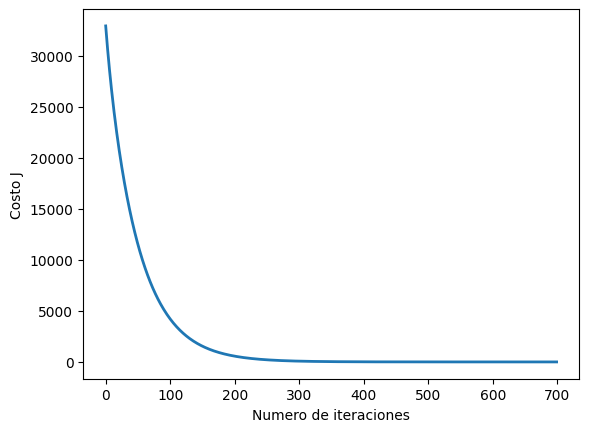

In [175]:
theta = np.zeros(13)

num_ite = 700
alpha = 0.01
lambda_ = 0.1
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite, lambda_)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

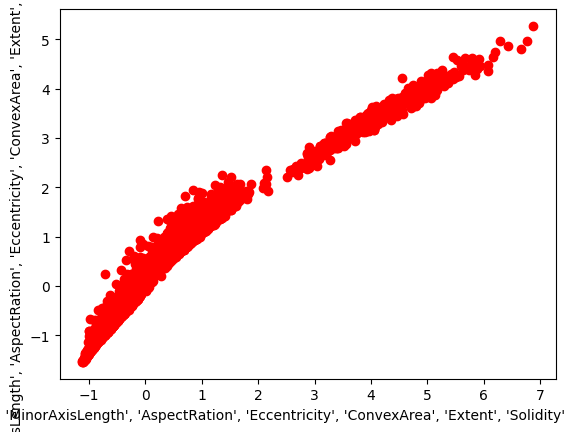

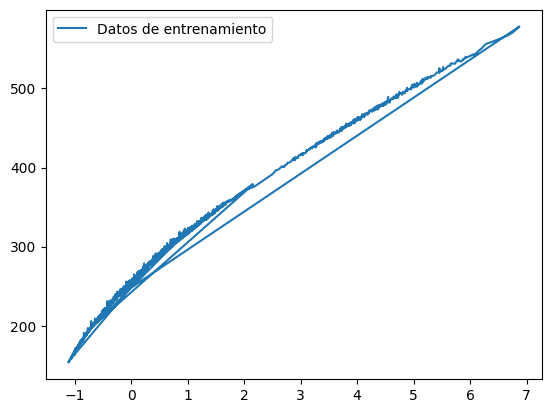

In [18]:

graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel, xlabel)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [56]:
y_pred = np.dot([1,28395, 610.291, 208.1781167, 173.888747, 1.197191424, 0.549812187, 28715, 0.763922518, 0.988855999, 0.958027126, 0.913357755, 0.007331506], theta)
print(y_pred)

603142.1554937332


In [58]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [59]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [60]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [ 7.14525252e-02  9.23265364e-04  2.95312598e-02  3.11562758e-01
  5.52254054e-01 -1.03371231e+01  1.73530785e+01 -8.26620396e-04
  5.18623120e-02  4.19577131e+01  1.01466286e+01 -3.49446937e+01
 -1.10866970e+03]


In [61]:
X_array = [1, 28395, 610.291, 208.1781167, 173.888747, 1.197191424, 0.549812187, 28715,	0.763922518, 0.988855999, 0.958027126, 0.913357755, 0.007331506
]
price = np.dot(X_array, theta)

print(f"diametro predicho para un frijol de caracteristicas: area 28395, perimetro 610.291 (usando la ecuación de la normal): {price}")

diametro predicho para un frijol de caracteristicas: area 28395, perimetro 610.291 (usando la ecuación de la normal): 189.8358374848307


<H1> REGRESION POLINOMICA <H1>

In [271]:
# Leer datos
data = np.loadtxt('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :12]  # Todas las columnas excepto la última (EquivDiameter)
y = data[:, 12]   # Última columna (EquivDiameter)

# Graficar datos
xlabel = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1"]
ylabel = "EquivDiameter"
#X_norm, mu, sigma = normalizarCaracteristicas(X)
m = y.size  # Tamaño de y (número de ejemplos)



In [272]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [273]:
X.shape

(13611, 12)

In [274]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
#print(X_norm)

Media calculada: [5.30482845e+04 8.55283459e+02 3.20141867e+02 2.02270714e+02
 1.58324198e+00 7.50894929e-01 5.37682002e+04 7.49732787e-01
 9.87142844e-01 8.73281831e-01 7.99863682e-01 6.56360851e-03]
Desviación estandar calculada: [2.93230185e+04 2.14281824e+02 8.56910379e+01 4.49684393e+01
 2.46669394e-01 9.19983835e-02 2.97738220e+04 4.90845636e-02
 4.66020797e-03 5.95177014e-02 6.17111960e-02 1.12795679e-03]


In [275]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [276]:
def computeCost(X, y, theta, lambda_):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    #sin regularizacion
    #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    #CON REGULARIZACION
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [277]:
theta=np.array([0.5, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0])
lambdas_ = 0.1
#LAMBDAS_ PARA OBTENER EL COSTO DE ACUERDO A LAS THETAS APLICADAS
JJ = calcularCosto(X, y, theta, lambdas_)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.5  0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.  ] se obtiene un costo de: 33640.75133459026


In [288]:
def calcularDescensoGradientes(X, y, theta, alpha, numero_iteraciones, lambda_):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    #SIN REGULARIZACION
    #theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    #CON REGULARIZACION
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    theta[1:] += (lambda_ / m) * theta[1:]
    J_historico.append(computeCost(X, y, theta, lambda_))


  return theta, J_historico


los valores de theta calculados son: [ 2.52841445e+02  1.04025010e+01  9.63348564e+00  9.50373846e+00
  1.05799746e+01  1.27666121e+00  1.81265042e+00  1.03712748e+01
  1.01582672e-01  5.75096207e-01  1.51039862e-01 -1.68627008e+00
 -9.68815950e+00]
con un costo de: 0.5009342272974241 


Text(0, 0.5, 'Costo J')

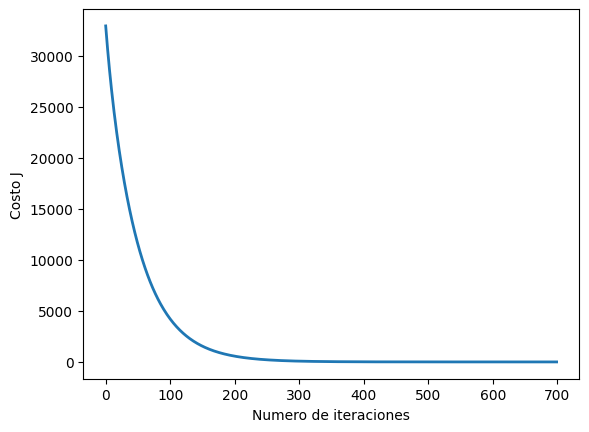

In [289]:
theta = np.zeros(13)

num_ite = 700
alpha = 0.01
lambda_ = 0.1
theta, J_historico = calcularDescensoGradientes(X, y, theta, alpha, num_ite, lambda_)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

<h1> USO DE REGULARIZACION LABORATORIO 2  <h1>

In [291]:
# libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/ecomUserChurnData1.csv', delimiter=',')

#Imprimimos el dataset.
dataset

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,time_to_tran,int_cat1_n,target_class
0,89,23,16.000000,0.000000,0.000000,39,2,0.051282,3,1.500000,...,7.000000,0.000000,11.000000,7.071068,0.500000,2.866667,1.911111,-1,0,1
1,251,23,61.000000,0.000000,0.000000,85,2,0.023529,2,1.000000,...,6.000000,1.414214,13.500000,2.121320,1.000000,0.000000,0.000000,-1,0,1
2,270,14,0.100000,0.300000,3.000000,21,11,0.523810,13,1.181818,...,7.454546,0.522233,12.636364,4.342182,0.363636,1.104545,0.934615,-1,0,1
3,298,11,13.000000,0.000000,0.000000,24,2,0.083333,4,2.000000,...,7.500000,0.707107,11.500000,4.949748,0.000000,0.508333,0.254167,-1,0,1
4,474,16,26.000000,0.000000,0.000000,43,2,0.046512,2,1.000000,...,7.000000,0.000000,19.500000,2.121320,0.500000,0.000000,0.000000,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49353,1406824,14,73.000000,0.000000,0.000000,87,2,0.022989,2,1.000000,...,6.500000,2.121320,10.500000,2.121320,0.000000,0.000000,0.000000,-1,0,1
49354,1406906,19,13.000000,0.000000,0.000000,32,2,0.062500,4,2.000000,...,7.000000,0.000000,12.000000,5.656854,0.000000,4.016667,2.008333,-1,0,1
49355,1406914,21,0.666667,0.942809,1.414214,23,4,0.173913,14,3.500000,...,7.000000,0.000000,13.250000,2.629955,0.750000,6.362500,1.817857,-1,0,1
49356,1407221,1,0.000000,0.000000,-1.000000,2,2,1.000000,2,1.000000,...,8.000000,0.000000,14.500000,7.778174,1.000000,0.000000,0.000000,-1,0,1


In [292]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

#Separamos en X_test los datos, pero dropeando (Y) 'target_class'
X_test = test_dataset.drop(['target_class'], axis=1).values

#Separamos en y_test los datos, pero solo cargando la columna de 'target_class', ya que esa sera nuestra y
y_test = test_dataset['target_class'].values

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'target_class' para y_train
X_train = train_dataset.drop(['target_class'], axis=1).values
y_train = train_dataset['target_class'].values
m_train = len(y_train)

In [293]:

# Imprimir las primeras 10 instancias con 26 columnas y la variable Y
print('{:>12s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n', 'target_class'
))
print('-' * 366)

for i in range(10):
    print('{:12.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], X_train[i, 11], X_train[i, 12], X_train[i, 13], X_train[i, 14], X_train[i, 15], X_train[i, 16], X_train[i, 17], X_train[i, 18], X_train[i, 19], X_train[i, 20], X_train[i, 21], X_train[i, 22], X_train[i, 23], X_train[i, 24], X_train[i, 25], y_train[i]
    ))




   visitorid ses_recses_rec_avgses_rec_sdses_rec_cv  user_rec     ses_n   ses_n_r     int_n   int_n_r    tran_n  tran_n_r   rev_sum rev_sum_rmajor_spend_rint_cat_n_avgint_itm_n_avgses_mo_avg ses_mo_sdses_ho_avg ses_ho_sdses_wknd_rses_len_avgtime_to_inttime_to_tranint_cat1_ntarget_class
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  601098.000   0.000    61.000     0.000     0.000    62.000     2.000     0.032     3.000     1.500     0.000     0.000     0.000     0.000     0.000     1.000     1.500     7.000     1.414    10.500     6.364     0.000     0.267     0.178    -1.000     0.000     1.000
  160253.000  22.000     0.000     0.000    -1.000    22.000     3.000     

In [294]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [295]:
# Imprimir los valores normalizados de las características para las primeras 10 instancias
X_norm, mu, sigma= featureNormalize(X_train)
# Imprimir las primeras 10 instancias con 26 columnas y la variable Y
print('{:>12s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n',
))
print('-' * 290)

for i in range(10):
    print('{:12.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17], X_norm[i, 18], X_norm[i, 19], X_norm[i, 20], X_norm[i, 21], X_norm[i, 22], X_norm[i, 23], X_norm[i, 24], X_norm[i, 25]
    ))



   visitorid ses_recses_rec_avgses_rec_sdses_rec_cv  user_rec     ses_n   ses_n_r     int_n   int_n_r    tran_n  tran_n_r   rev_sum rev_sum_rmajor_spend_rint_cat_n_avgint_itm_n_avgses_mo_avg ses_mo_sdses_ho_avg ses_ho_sdses_wknd_rses_len_avgtime_to_inttime_to_tranint_cat1_n
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      -0.257  -1.681     2.732    -0.413     0.020     1.110    -0.179    -0.381    -0.092    -0.151    -0.039    -0.149    -0.033    -0.097    -0.180    -0.152     0.067    -0.346     2.074    -0.847     0.994    -0.750    -0.417    -0.468    -0.205    -0.048
      -1.338   0.710    -0.619    -0.413    -1.068    -0.471    -0.051    -0.096    -0.020     0.192    -0.039    -0.149    -0.033    -0.097    -0.180    -0.152     0.545   

In [296]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]'
))
print('-' * 142)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11], X_ready[i, 12],X_ready[i, 13],X_ready[i, 14],X_ready[i, 15],X_ready[i, 16],X_ready[i, 17],X_ready[i, 18],X_ready[i, 19],X_ready[i, 20],X_ready[i, 21],X_ready[i, 22],X_ready[i, 23]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]X[:, 14]X[:, 15]X[:, 16]X[:, 17]X[:, 18]  X[:, 19]  X[:, 20]X[:, 21]X[:, 22]
----------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.257    -1.681     2.732  -0.413   0.020   1.110  -0.179  -0.381    -0.092  -0.151  -0.039  -0.149  -0.033  -0.097  -0.180  -0.152   0.067  -0.346   2.074  -0.847   0.994  -0.750  -0.417
   1.000  -1.338     0.710    -0.619  -0.413  -1.068  -0.471  -0.051  -0.096    -0.020   0.192  -0.039  -0.149  -0.033  -0.097  -0.180  -0.152   0.545  -0.346  -0.671   0.361   0.223   2.046   0.886
   1.000  -0.833    -0.703     1.304  -0.413   0.020   0.399  -0.179  -0.345    -0.117  -0.494  -0.039  -0.149  -0.033  -0.097  -0.180  -0.152  -0.412   0.518   0.701   0.652   1.463   0.648  -0.493
   1.000   0.408    -0.485     0.040  -0.413   0.020  -0.3

In [297]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [298]:
print(sigmoid(0))

0.5


In [299]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


In [320]:
def CostoCalculado(theta, X, y, lambda_ ):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    #hacemos el uso de la funcion sigmoid
    #sin regularizacion
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    #con regularizacion
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [321]:
def descensoGradientess(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        #SIN REGULARIZACION
        #theta = theta - (alpha / m) * (h - y).dot(X)
        #CON REGULARIZACION
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        theta[1:] += (lambda_ / m) * theta[1:]

        J_history.append(CostoCalculado(theta, X, y, lambda_))
    return theta, J_history

########################################################################################################
Los valores de theta calculados son:
theta 1: 0.8857569771500171
theta 2: -0.0006296816160406849
theta 3: 0.0978392056327113
theta 4: 0.07509197245276167
theta 5: 0.02757364712933094
theta 6: -0.027122415521528356
theta 7: -0.11483301374421953
theta 8: -0.0176737964735244
theta 9: -0.005857118316844591
theta 10: 0.01741877002075932
theta 11: -0.0009739546569531211
theta 12: -0.004324141770845167
theta 13: 0.003216688017533127
theta 14: -0.00255192729687665
theta 15: -0.0026042214210404324
theta 16: -0.003975837003827517
theta 17: -0.002486109473109189
theta 18: -0.0076223080167960216
theta 19: 0.007043554465097738
theta 20: 0.01145337246719672
theta 21: 0.001215586121156208
theta 22: -0.0012746608262095807
theta 23: 0.00261684552732824
theta 24: 0.0015567205393198647
theta 25: -0.002557079444588335
theta 26: 0.0029595096310425597
theta 27: 2.3144938790367077e-05
####################

Text(0, 0.5, 'Costo J')

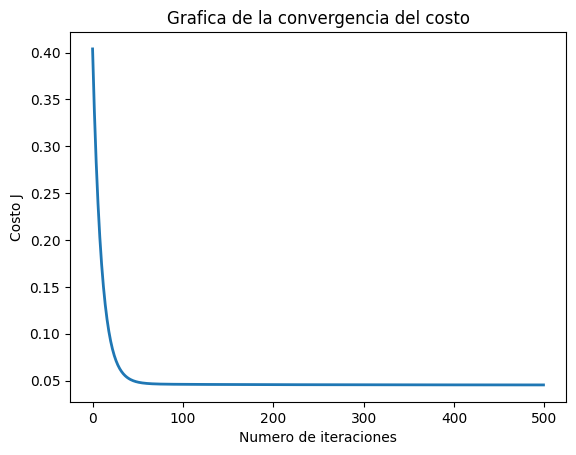

In [323]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 5000 y un alpha 0.009
num_ite = 500
alpha = 0.05
lambda_= 0.1
theta, J_historico = descensoGradientess(theta, X_ready, y_train, alpha, num_ite, lambda_)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [324]:
X_array = [1,2866,0,22,0,0,23,2,0.08695652,3,1.5,0,0,0,0,0,1,1,7.5,0.70710677,18,7.071068,1,6.0916667,4.061111,-1,0
]
X_array_copy = X_array.copy()



# Se calcula el resultado utilizando la función sigmoid y el producto punto entre X_array y theta
resultados = sigmoid(np.dot(X_array, theta))

# Se imprime el resultado
print(f"Una persona con las características: {X_array_copy}")
print(f"Tiene una probabilidad de abandono del comercio electrónico del {resultados * 100}%")
print(f"Con valores de theta: {theta}")


Una persona con las características: [1, 2866, 0, 22, 0, 0, 23, 2, 0.08695652, 3, 1.5, 0, 0, 0, 0, 0, 1, 1, 7.5, 0.70710677, 18, 7.071068, 1, 6.0916667, 4.061111, -1, 0]
Tiene una probabilidad de abandono del comercio electrónico del 13.81587293645591%
Con valores de theta: [ 8.85756977e-01 -6.29681616e-04  9.78392056e-02  7.50919725e-02
  2.75736471e-02 -2.71224155e-02 -1.14833014e-01 -1.76737965e-02
 -5.85711832e-03  1.74187700e-02 -9.73954657e-04 -4.32414177e-03
  3.21668802e-03 -2.55192730e-03 -2.60422142e-03 -3.97583700e-03
 -2.48610947e-03 -7.62230802e-03  7.04355447e-03  1.14533725e-02
  1.21558612e-03 -1.27466083e-03  2.61684553e-03  1.55672054e-03
 -2.55707944e-03  2.95950963e-03  2.31449388e-05]


In [325]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [326]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -1.400    -0.159     1.743  -0.413   0.020   0.952  -0.179  -0.375    -0.117  -0.494  -0.039
   1.000  -0.219     1.145    -0.345   0.659   1.558   0.280   0.078  -0.202    -0.068  -0.494  -0.039
   1.000   0.505    -0.594    -0.619  -0.413  -1.068  -0.906  -0.051   0.278    -0.092  -0.494  -0.039
   1.000   0.006     0.384    -0.619  -0.413  -1.068  -0.589  -0.051  -0.037     0.341   3.624  -0.039
   1.000   1.608     0.928    -0.619  -0.413  -1.068  -0.392  -0.179  -0.241    -0.092  -0.151  -0.039
   1.000  -1.224    -0.812    -0.455  -0.413   0.020  -0.866  -0.179  -0.013    -0.117  -0.494  -0.039
   1.000   1.061     0.384    -0.162   0.710   0.987   0.438   0.078  -0.226    -0.068  -0.494  -0.039
   1.000   0.390     0.928    -0.235   0.648   1.107   0.162  

In [327]:
y_predicha = []

# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

# Usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# Imprimir todos los datos de X y las predicciones
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]', 'X[:, 24]', 'y_predicha', '(y) usando el umbral'
))
print('-' * 250)

# Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10d}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12], X_test_ready[i, 13],
        X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20],
        X_test_ready[i, 21], X_test_ready[i, 22], X_test_ready[i, 23], X_test_ready[i, 24], y_predicha[i], y_umbral[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]  X[:, 19]  X[:, 20]  X[:, 21]  X[:, 22]  X[:, 23]  X[:, 24]y_predicha(y) usando el umbral
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -1.400    -0.159     1.743  -0.413   0.020   0.952  -0.179  -0.375    -0.117    -0.494    -0.039    -0.149    -0.033    -0.097    -0.180    -0.152    -0.412    -0.346     2.074     0.277     1.229     2.046    -0.493    -0.644     0.714         1
   1.000  -0.219     1.145    -0.345   0.659   1.558   0.280   0.078  -0.202    -0.068    -0.494    -0.039    -0.149    -0.033    -0.097    -0.180    -0.152    -0.412    -0.346    -0.671     1.151     0.606    -0.750    -0.49

In [310]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 88.56 %


<h1> REGULARIZACION EN LABORATORIO 3 <H1>

In [329]:
input_layer_size  = 18
# tengo 6 clases
num_labels = 6
#se pone 7 a pesar de haber 6 clases con esto el 0 no se toma en cuenta (como es uno contra todos hay que realizar este artificio para considerar todas las clases u otra opcion es convertir el 6 en 0)(el argmmax nos da 0 1 2 y para tomar en cuenta las 3 clases aumentamos 1 mas y quitamos el 0)
data = np.loadtxt('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/Datos.csv', delimiter=',', skiprows=1, usecols=range(1, input_layer_size+1))

# Separar las características (X) de las etiquetas (y)
X = data[:, :-1]  # Todas las filas, todas las columnas excepto la última
y = data[:, -1]   # Todas las filas, última columna

# Número de ejemplos
m = y.size

In [330]:
print(X[0, :])
print('---------------------- ')  # Imprime la primera fila de características
print(y)             # Imprime las etiquetas


[ 0.          1.          0.          2.          0.          0.
  3.          3.          0.14893617  0.32075472  0.18656716  0.5
  0.66666667  0.5         0.          0.5        24.38652644]
---------------------- 
[1. 1. 1. ... 5. 3. 5.]


In [331]:
# Calcular el conteo de cada clase
clases, conteo = np.unique(y, return_counts=True)

# Imprimir el conteo de cada clase
for clase, count in zip(clases, conteo):
    print(f"Clase {int(clase)}: {count} ejemplos")

Clase 0: 2795 ejemplos
Clase 1: 3369 ejemplos
Clase 2: 2717 ejemplos
Clase 3: 2812 ejemplos
Clase 4: 3261 ejemplos
Clase 5: 3545 ejemplos
Clase 6: 4370 ejemplos


In [332]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [333]:
X_norm, mu, sigma = featureNormalize(X)

In [334]:
m, n = X.shape
X = X_norm

In [335]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [350]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0
    #CONREGULARIZACION
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    #grad = (1 / m) * (h - y).dot(X)
    #grad = grad - (lambda_ / m) * temp
    #SINCONREGULARIZACION
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [351]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [352]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    return p
    # Calcula el número de datos para el conjunto de entrenamiento (80%)
num_train = int(0.8 * 22800)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]
# Entrenar el modelo utilizando todos los datos
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
all_theta_train = oneVsAll(X_train, y_train, num_labels, lambda_)

In [353]:
print(all_theta)

[[-1.69278067e+01  6.95066076e-02 -5.51987142e-02  6.93681002e-03
  -1.39696502e-01 -1.94375052e-01 -1.79081233e-02  1.48447178e-01
  -4.31909643e-01 -3.91417752e-01  6.65780459e-01 -5.80066233e+00
   2.32099432e-01  1.58892701e-01  1.66196384e-01 -3.24588929e-03
   2.91151791e-01 -6.85057262e+00]
 [-2.72375481e+00  3.99418069e-01  5.00586640e-02 -4.13633526e-02
  -1.18560285e-01  1.14820992e-01 -1.04179005e-01  3.73231118e-02
   1.72579945e-01 -1.84758281e-01 -2.54547299e-01 -1.36001721e+00
  -2.68994892e-02  2.32691376e-01 -1.16090685e-01  1.02497638e-01
  -2.06517010e-01 -2.73536043e-01]
 [-2.46216663e+00  2.33308262e-01 -1.75915359e-02  1.26348748e-01
   3.74008777e-01 -1.19232880e-02  2.50156390e-01 -4.93421889e-01
  -4.29929178e-02 -1.18819087e-02  7.24961745e-01 -3.42827970e+00
  -2.68822950e-01 -2.79373453e-01  2.52260526e-01  1.24370613e-01
  -1.73799845e-01  2.31580037e+00]
 [-2.50974873e+00  5.19073248e-01  5.97037008e-01 -4.64313931e-01
   1.77704663e-01 -5.49693088e-02 -2.

In [354]:
# Predecir las clases utilizando el conjunto de entrenamiento
pred_train = predictOneVsAll(all_theta_train, X_train)

# Calcular la precisión del conjunto de entrenamiento
accuracy_train = np.mean(pred_train == y_train) * 100
print('Precisión del conjunto de entrenamiento: {:.2f}%'.format(accuracy_train))
# Predecir las clases utilizando el conjunto de prueba
pred_test = predictOneVsAll(all_theta_train, X_test)

# Calcular la precisión del conjunto de prueba
accuracy_test = np.mean(pred_test == y_test) * 100
print('Precisión del conjunto de prueba: {:.2f}%'.format(accuracy_test))

# Aquí puedes realizar cualquier otra evaluación o visualización necesaria

Precisión del conjunto de entrenamiento: 56.99%
Precisión del conjunto de prueba: 57.50%


<h1>CONCLUSIÓN<h1>

Se notó una mejora distintiva en la función de costo y en la precisión del conjunto de prueba al aplicar regularización. Esto es un comportamiento esperado y deseado, ya que la regularización ayuda a prevenir el sobreajuste y

Se notó una Mejora en la función de costo: La regularización agrega un término de penalización a la función de costo, lo que generalmente resulta en un valor más alto de la función de costo en comparación con el modelo sin regularización. Sin embargo, esto es un costo necesario para evitar el sobreajuste y mejorar la generalización.

Se notó una Mejora en la precisión del conjunto de prueba: Al evitar el sobreajuste, el modelo regularizado tiene un mejor rendimiento en los datos de prueba, que son los datos más importantes para evaluar el rendimiento real del modelo en nuevos datos desconocidos.